In [77]:
import os, sys
#from google.colab import drive
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, SimpleRNN, LSTM, Activation

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm, metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#COLAB STUFF:
#drive.mount('/content/drive')
#nb_path = '/content/notebooks'
#sys.path.insert(0,nb_path)
    
#df1 = pd.read_csv('/content/drive/MyDrive/NLP/spam_preprocessed.csv', index_col=False)




spam_preprocessed

   label                                               text
0      0  go jurong point avail bugi n great world la e ...
1      0                              ok lar joke wif u oni
2      1  free entri wkli comp win fa cup final tkt may ...
3      0                u dun say earli hor u c alreadi say
4      0               nah think goe usf live around though


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       908
           1       1.00      0.84      0.91       121

    accuracy                           0.98      1029
   macro avg       0.99      0.92      0.95      1029
weighted avg       0.98      0.98      0.98      1029



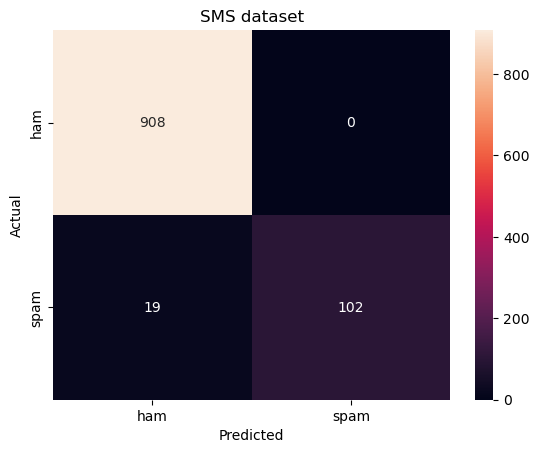

In [74]:
df1 = pd.read_csv('../Data/preprocessed/spam_preprocessed.csv', index_col=False)
#df1 = pd.read_csv('/content/drive/MyDrive/NLP/spam_preprocessed.csv', index_col=False) #COLAB

print(df1.head())
df1 = df1.dropna()

#TODO: discuss this with jopi
#X_train, X_val, y_train, y_val = train_test_split(df1['text'], df1['label'], train_size=0.7)
#X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, train_size=0.5)
X_train, X_test, y_train, y_test = train_test_split(df1['text'], df1['label'], test_size = 0.2, random_state = 1)


vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)

X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)

print("\n")
print(classification_report(y_test, y_pred))

plt.style.use('default')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["ham", "spam"], yticklabels=["ham", "spam"])
plt.title('SMS dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Figures/SVM_SMS_cm.png')
plt.show()

SAME FOR OTHER DATASETS:

   label                                   transformed_text
0      0    calpin daili ga nomin calpin daili ga nomin doc
1      0  issu fyi see note alreadi done stella forward ...
2      0  meter nov alloc fyi forward lauri allen hou ec...
3      0  mcmullen ga jacki sinc inlet river plant shut ...
4      0  meter jan georg need follow done jan zero rece...


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2421
           1       0.98      1.00      0.99      2237

    accuracy                           0.99      4658
   macro avg       0.99      0.99      0.99      4658
weighted avg       0.99      0.99      0.99      4658



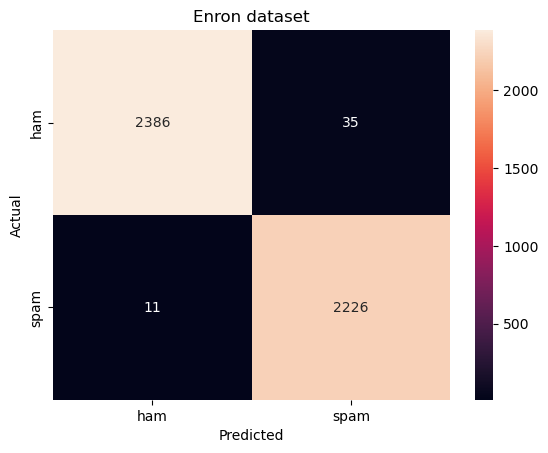

In [76]:
df2 = pd.read_csv('../Data/preprocessed/enron_preprocessed.csv', index_col=False)
#df2 = pd.read_csv('/content/drive/MyDrive/NLP/enron_spam_data.csv', index_col=False)
print(df2.head())
df2 = df2.dropna()
X_train, X_test, y_train, y_test = train_test_split(df2['transformed_text'], df2['label'], test_size = 0.2, random_state = 1)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)

X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)

print("\n")
print(classification_report(y_test, y_pred))

plt.style.use('default')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["ham", "spam"], yticklabels=["ham", "spam"])
plt.title('Enron dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Figures/SVM_enron_cm.png')
plt.show()

   label                                               text
0      0  go jurong point crazy available bugis n great ...
1      0                            ok lar joking wif u oni
2      1  free entry wkly comp win fa cup final tkts may...
3      0                u dun say early hor u c already say
4      0                nah think go usf life around though


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4276
           1       0.98      0.98      0.98      3374

    accuracy                           0.98      7650
   macro avg       0.98      0.98      0.98      7650
weighted avg       0.98      0.98      0.98      7650



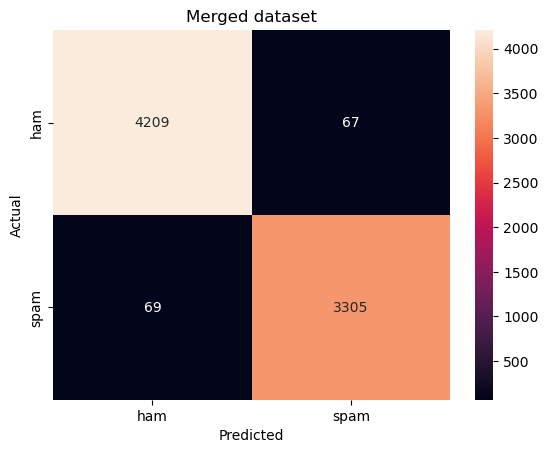

In [78]:
df3 = pd.read_csv('../Data/preprocessed/merged_preprocessed.csv', index_col=False)
#df3 = pd.read_csv('/content/drive/MyDrive/NLP/merged_cleaned.csv', index_col=False)
print(df3.head())

df3 = df3.dropna()
X_train, X_test, y_train, y_test = train_test_split(df3['text'], df3['label'], test_size = 0.2, random_state = 1)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

from sklearn import svm
svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)

print("\n")
print(classification_report(y_test, y_pred))

plt.style.use('default')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["ham", "spam"], yticklabels=["ham", "spam"])
plt.title('Merged dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('Figures/SVM_merged_cm.png')
plt.show()